# Import libraries

In [1]:
import pandas as pd  # keywords are highlighted in green, other strings in red, etc.
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#for plots
import matplotlib.pyplot as plt
import seaborn as sns

# Read the files into python as dataframes

In [2]:
#data_mca.to_csv('./marketing_customer_analysis.csv', index=False) #without indexing column!
data_mca = pd.read_csv('./marketing_customer_analysis.csv')
data_mca

data_mca = data_mca.drop(['Unnamed: 0'], axis=1)
data_mca.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


## Show the dataframe shape.

In [3]:
data_mca.shape

(10910, 25)

In [4]:
data_mca.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

# Standardize header names --> everything to lower case and with underscore

In [5]:
#Headers all on lower case
mca = []
for mcaname in data_mca.columns:
    mca.append(mcaname.lower())
data_mca.columns = mca

In [6]:
#Headers without space
data_mca = data_mca.rename(columns={'EmploymentStatus':'Employment Status'})

In [7]:
#Headers replace the space by "_"
data_mca.columns = data_mca.columns.str.replace(' ', '_')
data_mca.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

# Check types of columns

In [8]:
# 3 Which columns are numerical? # 4 Which columns are categorical?
data_mca.dtypes
#data.select_dtypes(np.number) # will show us how many columns are numerical
#data.select_dtypes(object) # will show us how many columns are numerical

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
vehicle_type    

### 5. Check and deal with NaN values.

In [9]:
#Check for duplicate rows in the data and remove if any.
sum(data_mca.duplicated()) #check how many rows are duplicated.
data_mca = data_mca.drop_duplicates()
data_mca.isna().sum()

customer                            0
state                             614
customer_lifetime_value             0
response                          614
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           623
months_since_policy_inception       0
number_of_open_complaints         623
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     608
vehicle_size                      608
vehicle_type                     5465
dtype: int64

In [10]:
#round(data_mca.isna().sum()/len(data_mca),4)*100  # shows the percentage of null values in a column

nulls_df = pd.DataFrame(round(data_mca.isna().sum()/len(data_mca),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,customer,0.00
1,state,5.65
2,customer_lifetime_value,0.00
3,response,5.65
4,coverage,0.00
5,education,0.00
6,effective_to_date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [11]:
# # strategy: drop rows that have null values (only if there are very few)
data_mca[data_mca['state'].isna()==True].head(60)

#We can see that 'state' and 'response' seem to be missing in the same rows. --> drop the rows.

data_mca = data_mca[data_mca['state'].isna()==False]
data_mca
data_mca.isna().sum()
data_mca.shape

(10259, 25)

In [12]:
data_mca[data_mca['months_since_last_claim'].isna()==True].head(60)

#We can see that 'months_since_last_claim' and 'number_of_open_complaints' seem to be missing in the same rows. --> drop the rows.
data_mca = data_mca[data_mca['months_since_last_claim'].isna()==False]
data_mca
data_mca.isna().sum()
#data_mca1.shape


customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     543
vehicle_size                      543
vehicle_type                     4861
dtype: int64

In [13]:
# vehicle_class
data_mca[data_mca['vehicle_class'].isna()==True].head(60)
data_mca['vehicle_class'].unique()
data_mca['vehicle_class'].mode()

data_mca['vehicle_class'].value_counts(dropna=True)
data_mca['vehicle_class'] = data_mca['vehicle_class'].fillna(data_mca['vehicle_class'].value_counts(dropna=True).index[0])

data_mca.isna().sum()


#merged_clean_ver1['state'] = merged_clean_ver1['state'].fillna(merged_clean_ver1['state'].value_counts(dropna=True).index[0])


customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                       0
vehicle_size                      543
vehicle_type                     4861
dtype: int64

In [14]:
# vehicle_size
data_mca[data_mca['vehicle_size'].isna()==True].head(60)
data_mca['vehicle_size'].unique()
data_mca['vehicle_size'].mode()

# --> fill it with the
data_mca['vehicle_size'].value_counts(dropna=True)
data_mca['vehicle_size'] = data_mca['vehicle_class'].fillna(data_mca['vehicle_class'].value_counts(dropna=True).index[0])

data_mca.isna().sum()

customer                            0
state                               0
customer_lifetime_value             0
response                            0
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim             0
months_since_policy_inception       0
number_of_open_complaints           0
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                       0
vehicle_size                        0
vehicle_type                     4861
dtype: int64

In [15]:
# vehicle_type --> nearly 50% is missing ! 
# strategy: input a value for the missing value (fill in a value that we choose or calculate)

data_mca.describe(include=[np.object]).T #--> only 1 unique value and NaN! so fill with the unique value
# data_mca[data_mca['vehicle_type'].isna()==True].head(60)
data_mca['vehicle_type'].unique()
data_mca['vehicle_type'] = data_mca['vehicle_type'].fillna('A')
data_mca.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
vehicle_type                     0
dtype: int64

### 6. Datetime format
Extract the months from the dataset and store in a separate column. 
Then filter the data to show only the information for the first quarter , 
ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [16]:
data_mca

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Four-Door Car,A
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Four-Door Car,A
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,SUV,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Four-Door Car,A
6,IW72280,California,5035.035257,No,Basic,Doctor,2/14/11,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Four-Door Car,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Two-Door Car,A
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Luxury SUV,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Four-Door Car,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Luxury SUV,A


In [17]:
data_mca.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type'],
      dtype='object')

In [18]:
#where is a date / month?
data_mca.dtypes #no "date" there
#data_mca['effective_to_date']
data_mca['effective_to_date'] = pd.to_datetime(data_mca['effective_to_date'], errors='coerce')
data_mca.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Four-Door Car,A
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Four-Door Car,A
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,SUV,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Four-Door Car,A
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Four-Door Car,A


In [22]:
data_mca['effective_to_date_month'] = pd.DatetimeIndex(data_mca['effective_to_date']).month_name()
data_mca

#data_mca = data_mca.insert(0,'effective_to_date_month')

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Four-Door Car,A,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Four-Door Car,A,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,SUV,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Four-Door Car,A,January
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Four-Door Car,A,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Two-Door Car,A,January
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Luxury SUV,A,February
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Four-Door Car,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Luxury SUV,A,February


In [27]:
data_mca['effective_to_date_month'].unique() # --> irritating, this means we have only information for Q1...

data_mca_Q1 = data_mca[(data_mca['effective_to_date_month']=='January') | (data_mca['effective_to_date_month']=='February') | (data_mca['effective_to_date_month']=='March')]
data_mca_Q1
#data[(data['target_d']<100) & (data['gender']=='F')]

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_date_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Four-Door Car,A,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Four-Door Car,A,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,SUV,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Four-Door Car,A,January
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Four-Door Car,A,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Two-Door Car,A,January
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Luxury SUV,A,February
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Four-Door Car,A,January
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Luxury SUV,A,February


#BONUS: Put all the previousl mentioned data transformations into a function.

In [ ]:
# Use string functions to standardize the states to uppercase and use the strip function to clean the strings as well.
#data['state'].unique()



# # Now define a function to clean the column
# def clean_header(x):
#     header = []
#     for x in data.columns:
#         header.append(x.lower())
#     data.columns = header

# #Headers all on lower case
# mca = []
# for mcaname in data_mca.columns:
#     mca.append(mcaname.lower())
# data_mca.columns = mca


# Round 3

### Show DataFrame info.

In [35]:
# describing the numerical columns
summary_numerical = data_mca.describe().T 
summary_numerical

# additionnaly we add the range and the iqr
summary_numerical['iqr'] = summary_numerical['75%']-summary_numerical['25%']

summary_numerical['range'] = summary_numerical['max']-summary_numerical['min']
summary_numerical

#round up the values to 2 decimals (round() would round to 0 decimals) --> with function
def roundforme(x):
    return round(x,2)

#to round the whole table..
for col in summary_numerical.columns:
    summary_numerical[col] = summary_numerical[col].apply(roundforme)
summary_numerical

,count,mean,std,min,25%,50%,75%,max,iqr,range
customer_lifetime_value,9677.0,8042.07,6962.49,1898.01,3991.73,5771.61,8986.61,83325.38,4994.88,81427.37
income,9677.0,37675.18,30380.91,0.00,0.00,34080.00,62291.00,99981.00,62291.00,99981.00
monthly_premium_auto,9677.0,93.21,34.47,61.00,68.00,83.00,109.00,298.00,41.00,237.00
months_since_last_claim,9677.0,15.13,10.06,0.00,6.00,14.00,23.00,35.00,17.00,35.00
months_since_policy_inception,9677.0,48.13,27.91,0.00,24.00,48.00,71.00,99.00,47.00,99.00
number_of_open_complaints,9677.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00,0.00,5.00
number_of_policies,9677.0,2.96,2.39,1.00,1.00,2.00,4.00,9.00,3.00,8.00
total_claim_amount,9677.0,434.38,291.48,0.10,272.65,383.17,547.20,2893.24,274.55,2893.14


In [32]:
# describing the object columns
summary_objects = data_mca.describe(include=[np.object]).T
summary_objects

,count,unique,top,freq
customer,9677,9134,BG42047,3
state,9677,5,California,3344
response,9677,2,No,8289
coverage,9677,3,Basic,5905
education,9677,5,Bachelor,2913
employmentstatus,9677,5,Employed,6035
gender,9677,2,F,4934
location_code,9677,3,Suburban,6126
marital_status,9677,3,Married,5605
policy_type,9677,3,Personal Auto,7208


In [36]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

### Show a plot of the total number of responses.

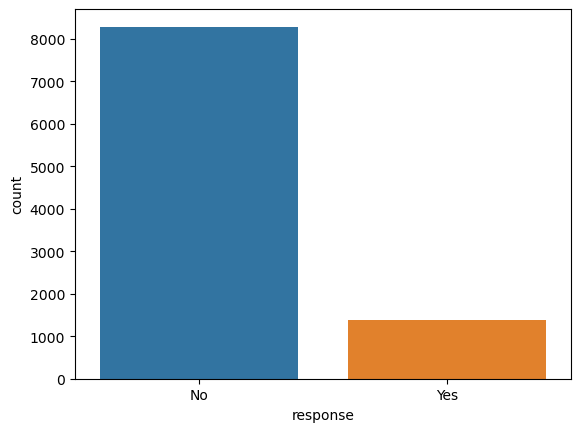

In [76]:
#Show a plot of the total number of responses.
data_mca['numerical_response'] = data_mca['response'].map(dict(Yes=1,No=0))
data_mca

sns.countplot(x=data_mca['response'])
plt.show()

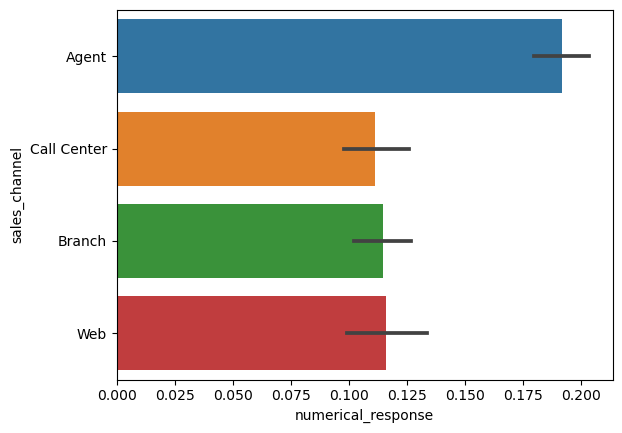

In [75]:
#Show a plot of the response rate by the sales channel.
sns.barplot(x="numerical_response", y="sales_channel", data=data_mca)
plt.show()

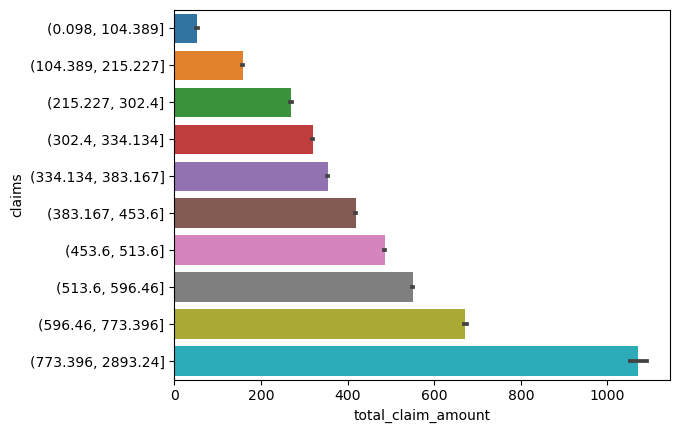

In [92]:
# Show a plot of the response rate by the total claim amount.
#perform data binning on points variable with specific quantiles and labels
data_mca['claims'] = pd.qcut(data_mca['total_claim_amount'], q=10)
data_mca

sns.barplot(x = data_mca['total_claim_amount'],y=data_mca['claims'] ,data=data_mca)
plt.show()

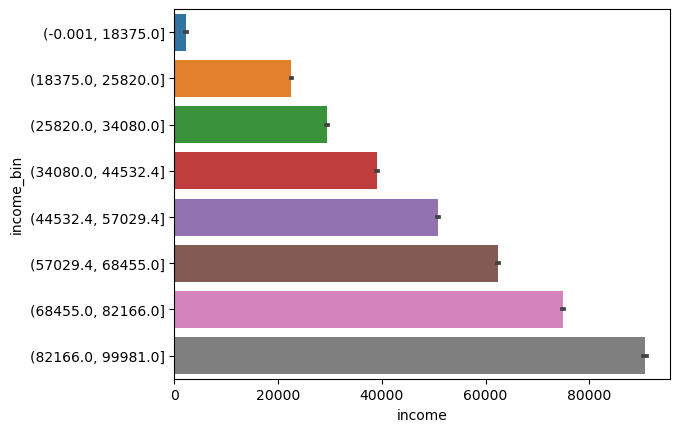

In [99]:
# Show a plot of the response rate by income.
data_mca['income_bin'] = pd.qcut(data_mca['income'], q=10, duplicates='drop')
data_mca

sns.barplot(x = data_mca['income'],y=data_mca['income_bin'] ,data=data_mca)
plt.show()